# Demo notebook for autoclasswrapper

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

print("matplotlib:", matplotlib.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)

matplotlib: 2.2.2
numpy: 1.15.4
pandas: 0.23.4


In [2]:
import autoclasswrapper as wrapper
print("autoclass:", wrapper.__version__)

autoclass: 0.2.0


## Dataset generation (toy dataset)

In [3]:
size = 50
sigma = 0.6
x = np.concatenate((np.random.normal(3, sigma, size), np.random.normal(4, sigma, size), np.random.normal(6, sigma, size)))
y = np.concatenate((np.random.normal(4, sigma, size), np.random.normal(0, sigma, size), np.random.normal(5, sigma, size)))
color = ["blue"]*size+["orange"]*size+["purple"]*size
name = ["id{:03d}".format(id) for id in range(size*3)]
df = pd.DataFrame.from_dict({"x":x, "y":y, "color":color})
df.index = name
df.index.name = "name"
df.head()

,x,y,color
name,,,
id000,2.287253,4.014585,blue
id001,1.866898,3.879627,blue
id002,3.329566,4.550235,blue
id003,2.346553,3.193327,blue
id004,2.947809,4.199388,blue


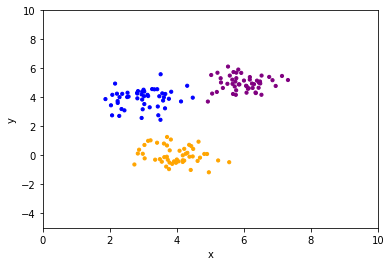

In [4]:
plt.scatter(df["x"], df["y"], color=df["color"], s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-5, 10);

In [5]:
# verify all x are > 0
assert min(df["x"]) > 0

Save `x` and `y` in 2 different files (that will be later merged)

In [6]:
df["x"].to_csv("demo_real_scalar.tsv", sep="\t", header=True)
df["y"].to_csv("demo_real_location.tsv", sep="\t", header=True)

## Autoclasswrapper - step 1 - prepare data

AutoClass can handle different types of data :

- *real scalar*: numerical values bounded by 0
- *real location*: numerical values, positive et negative
- *discrete*: values such as color...

Each data type must be entered as separated input file. After quality check, they are merged.

AutoClass handles very well missing data. Missing data must be represented by nothing (no `NA`, `?`...)

In [7]:
# create object to prepare dataset
clust = wrapper.Input()

# load datasets from tsv files
clust.add_input_data("demo_real_scalar.tsv", "real scalar", 0.01)
clust.add_input_data("demo_real_location.tsv", "real location", 0.01)

# merge datasets if multiple datasets had been loaded
clust.merge_dataframes()

# create files needed by autoclass
clust.create_db2_file()
clust.create_hd2_file()
clust.create_model_file()
clust.create_sparams_file()
clust.create_rparams_file()

2018-12-17 13:58:08 INFO     Reading data file 'demo_real_scalar.tsv' as 'real scalar' with error 0.01
2018-12-17 13:58:08 INFO     Detected encoding: ascii
2018-12-17 13:58:08 INFO     Found 150 rows and 2 columns
2018-12-17 13:58:08 DEBUG    Checking column names
2018-12-17 13:58:08 DEBUG    Index name 'name'
2018-12-17 13:58:08 DEBUG    Column name 'x'
2018-12-17 13:58:08 INFO     Checking data format
2018-12-17 13:58:08 INFO     Column 'x'
count    150.000000
mean       4.314410
std        1.388225
min        1.866898
50%        4.064548
max        7.317634
2018-12-17 13:58:08 INFO     Reading data file 'demo_real_location.tsv' as 'real location' with error 0.01
2018-12-17 13:58:08 INFO     Detected encoding: ascii
2018-12-17 13:58:08 INFO     Found 150 rows and 2 columns
2018-12-17 13:58:08 DEBUG    Checking column names
2018-12-17 13:58:08 DEBUG    Index name 'name'
2018-12-17 13:58:08 DEBUG    Column name 'y'
2018-12-17 13:58:08 INFO     Checking data format
2018-12-17 13:58:08 

## Autoclasswrapper - step 2 - prepare run script & run autoclass

For this step AutoClass need to be installed locally and available in path.
Here is a quick solution for a Linux Bash shell:
```
wget https://ti.arc.nasa.gov/m/project/autoclass/autoclass-c-3-3-6.tar.gz
tar zxvf autoclass-c-3-3-6.tar.gz
rm -f autoclass-c-3-3-6.tar.gz
export PATH=$PATH:$(pwd)/autoclass-c
# if you are using a 64-bit operating system,
# you also need to install the standard 32-bit C libraries:
# sudo apt-get install -y libc6-i386
```

In [8]:
# search autoclass in path
wrapper.search_autoclass_in_path()

# create object to run autoclass
run = wrapper.Run()

# prepare script to run autoclass
run.create_run_file()

# run autoclass
run.run()

2018-12-17 13:58:13 INFO     autoclass executable found in /home/pierre/.soft/bin/autoclass
2018-12-17 13:58:13 INFO     Writing run file
2018-12-17 13:58:13 INFO     Running clustering...


## Autoclasswrapper - step 3 - parse and format results

AutoClass results are parsed and formated for an easier use :

- `.cdt`: files can be open with [Java Tree View](http://jtreeview.sourceforge.net/)
- `.tsv`: file can be easily open and process with Microsoft Excel, R, Python...
- `_stats.tsv`: basic statistics for all classes
- `_dendrogram.png`: figure with a dendrogram showing relationship between classes

Note that the $n$ classes are numbered from 1 to $n$.


2018-12-17 13:58:42 INFO     Extracting autoclass results
2018-12-17 13:58:42 INFO     Found 150 cases classified in 3 classes
2018-12-17 13:58:42 INFO     Aggregating input data
2018-12-17 13:58:42 INFO     Writing classes + probabilities .tsv file
2018-12-17 13:58:42 INFO     Writing .cdt file
2018-12-17 13:58:42 INFO     Writing .cdt file (with probabilities)
2018-12-17 13:58:42 INFO     Writing class statistics
2018-12-17 13:58:42 INFO     Writing dendrogram
2018-12-17 13:58:43 INFO     clust_out.tsv added to zip file
2018-12-17 13:58:43 INFO     clust_out.cdt added to zip file
2018-12-17 13:58:43 INFO     clust_out_withprobs.cdt added to zip file
2018-12-17 13:58:43 INFO     clust_out_stats.tsv added to zip file
2018-12-17 13:58:43 INFO     clust_out_dendrogram.png added to zip file


'20181217-135843-autoclass-clust.zip'

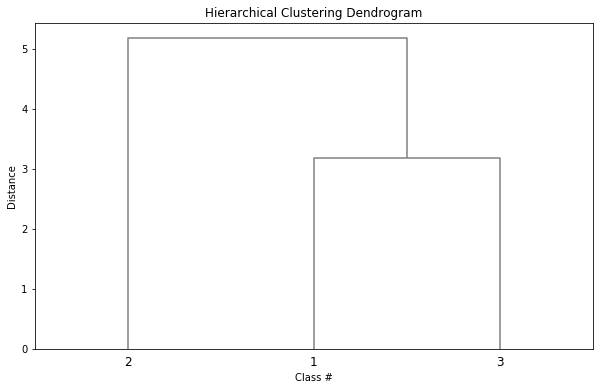

In [10]:
results = wrapper.Output()
results.extract_results()
results.aggregate_input_data()
results.write_cdt()
results.write_cdt(with_proba=True)
results.write_class_stats()
results.write_dendrogram()

# all output files are then wrapped into a zip archive.
results.wrap_outputs()

In [11]:
df_res = pd.read_csv("clust_out.tsv", sep="\t")

In [12]:
df_res.head()

,name,x,y,main-class,main-class-proba,class-1-proba,class-2-proba,class-3-proba
0,id000,2.287253,4.014585,1,1.0,1.0,0.0,0.0
1,id001,1.866898,3.879627,1,1.0,1.0,0.0,0.0
2,id002,3.329566,4.550235,1,1.0,1.0,0.0,0.0
3,id003,2.346553,3.193327,1,1.0,1.0,0.0,0.0
4,id004,2.947809,4.199388,1,1.0,1.0,0.0,0.0


In [13]:
df_res["main-class"] = (df_res["main-class"]
                        .replace(1, "green")
                        .replace(2, "purple")
                        .replace(3, "gray"))

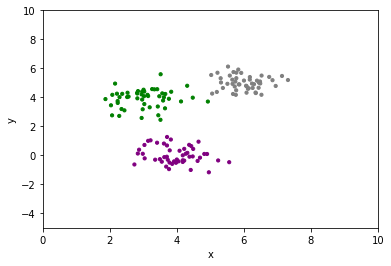

In [14]:
plt.scatter(df_res["x"], df_res["y"], color=df_res["main-class"], s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-5, 10);

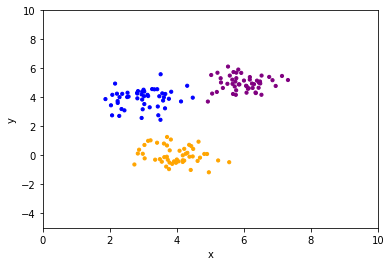

In [15]:
plt.scatter(df["x"], df["y"], color=df["color"], s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-5, 10);